In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

RANDOM_SEED = 42

In [2]:
!git clone https://github.com/sabrinachwalek/hand-gesture-detection.git

Cloning into 'hand-gesture-detection'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 53 (delta 24), reused 39 (delta 10), pack-reused 0
Unpacking objects: 100% (53/53), 957.79 KiB | 1.44 MiB/s, done.


# Specify each path

In [3]:
dataset = 'hand-gesture-detection/model/keypoint_classifier/keypoint.csv'
model_save_path = 'hand-gesture-detection/model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'hand-gesture-detection/model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 7

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 40)                1720      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 7)                 7

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/100
29/30 [============================>.] - ETA: 0s - loss: 1.9663 - accuracy: 0.1611
Epoch 1: saving model to hand-gesture-detection/model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 12s 38ms/step - loss: 1.9662 - accuracy: 0.1618 - val_loss: 1.8570 - val_accuracy: 0.3492
Epoch 2/100
25/30 [========================>.....] - ETA: 0s - loss: 1.8659 - accuracy: 0.2434
Epoch 2: saving model to hand-gesture-detection/model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 12ms/step - loss: 1.8607 - accuracy: 0.2485 - val_loss: 1.7537 - val_accuracy: 0.3323
Epoch 3/100
30/30 [==============================] - ETA: 0s - loss: 1.7668 - accuracy: 0.3019
Epoch 3: saving model to hand-gesture-detection/model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 10ms/step - loss: 1.7668 - accuracy: 0.3019 - val_loss: 1.5968 - val_accuracy: 0.3387
Epoch 4/100
30/30 [========

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 3ms/step - loss: 0.2471 - accuracy: 0.9397


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 91ms/step
[9.7494996e-01 9.2210015e-04 2.4124650e-02 1.1831612e-07 2.4909443e-06
 6.4934574e-07 2.3475311e-10]
0


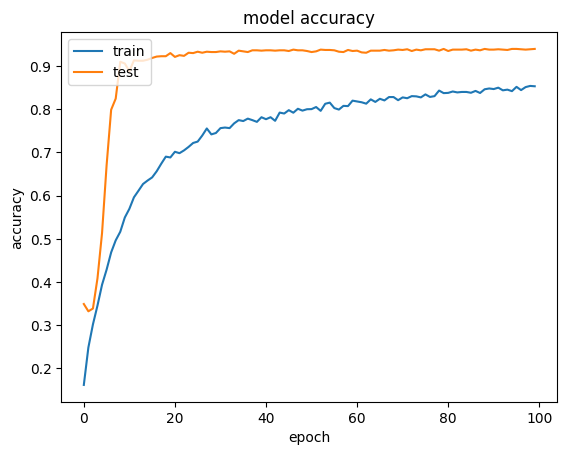

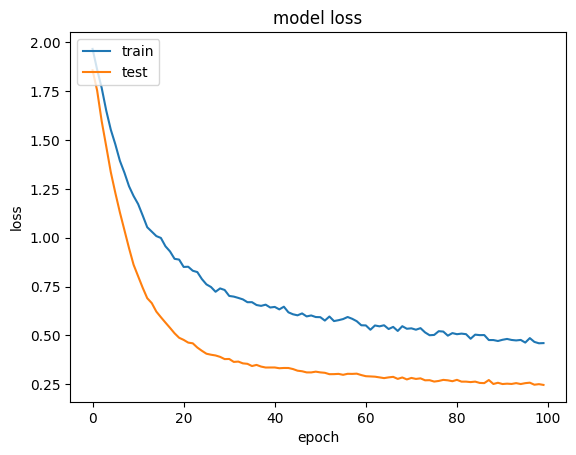

In [16]:
# Visualize training 

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Confusion Matrix

39/39 [==============================] - 0s 3ms/step


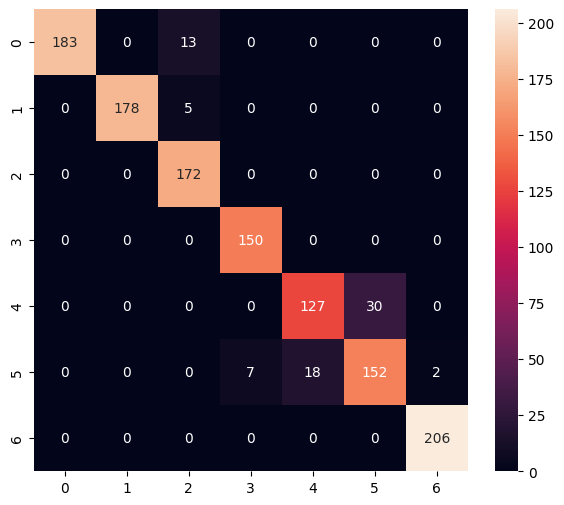

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       196
           1       1.00      0.97      0.99       183
           2       0.91      1.00      0.95       172
           3       0.96      1.00      0.98       150
           4       0.88      0.81      0.84       157
           5       0.84      0.85      0.84       179
           6       0.99      1.00      1.00       206

    accuracy                           0.94      1243
   macro avg       0.94      0.94      0.94      1243
weighted avg       0.94      0.94      0.94      1243



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

8856